In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.1


In [225]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv("..\diabetes_cleaned.csv")

#drop the old index, and heart specific as they are combined in heart_related
df.drop(['Unnamed: 0','heart_attack','angina_or_chd','chd_mi'], axis=1, inplace=True)

,diabetes,bmi,smoker,stroke,asthma,physical_activity,heavy_drinking,no_doctor_due_to_cost,any_healthcare_insurance,general_health_status,...,difficulty_walking,gender,age,education,income,race,sleep_time,years_smoked,routine_checkup,heart_related
0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,7.0,2.0,3.0,1.0,6.0,0.0,0.0,1
1,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,...,0.0,0.0,4.0,4.0,6.0,1.0,5.0,0.0,1.0,1
2,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,...,0.0,0.0,3.0,3.0,3.0,1.0,9.0,0.0,1.0,1
3,0.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,...,0.0,0.0,7.0,4.0,5.0,2.0,7.0,0.0,1.0,1
4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,0.0,0.0,7.0,2.0,5.0,1.0,8.0,0.0,1.0,1


In [23]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302953 entries, 0 to 302952
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   diabetes                  302953 non-null  float64
 1   bmi                       302953 non-null  float64
 2   smoker                    302953 non-null  float64
 3   stroke                    302953 non-null  float64
 4   asthma                    302953 non-null  float64
 5   physical_activity         302953 non-null  float64
 6   heavy_drinking            302953 non-null  float64
 7   no_doctor_due_to_cost     302953 non-null  float64
 8   any_healthcare_insurance  302953 non-null  float64
 9   general_health_status     302953 non-null  float64
 10  mental_health_status      302953 non-null  float64
 11  physical_health_status    302953 non-null  float64
 12  difficulty_walking        302953 non-null  float64
 13  gender                    302953 non-null  f

In [83]:
mpl.rcParams['figure.figsize'] = (6, 5)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [33]:
df.head()

,diabetes,bmi,smoker,stroke,asthma,physical_activity,heavy_drinking,no_doctor_due_to_cost,any_healthcare_insurance,general_health_status,...,difficulty_walking,gender,age,education,income,race,sleep_time,years_smoked,routine_checkup,heart_related
0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,7.0,2.0,3.0,1.0,6.0,0.0,0.0,1.0
1,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,...,0.0,0.0,4.0,4.0,6.0,1.0,5.0,0.0,1.0,1.0
2,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,...,0.0,0.0,3.0,3.0,3.0,1.0,9.0,0.0,1.0,1.0
3,0.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,...,0.0,0.0,7.0,4.0,5.0,2.0,7.0,0.0,1.0,1.0
4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,0.0,0.0,7.0,2.0,5.0,1.0,8.0,0.0,1.0,1.0


In [46]:
neg, pre, dia = np.bincount(df['diabetes'])
total = neg + pre + dia

neg_percent = 100 * (neg/total)
pre_percent = 100 * (pre/total)
dia_percent = 100 * (dia/total)

print(f'Total: {total}\n   None: {neg} ({neg_percent:.2f}%)\n   Pre: {pre} ({pre_percent:.2f}%)\n   Diabetes: {dia} ({dia_percent:.2f}%)')

Total: 302953
   None: 254681 (84.07%)
   Pre: 6793 (2.24%)
   Diabetes: 41479 (13.69%)


In [47]:
#We might need to reduce years smoked into categories
df.describe()


,diabetes,bmi,smoker,stroke,asthma,physical_activity,heavy_drinking,no_doctor_due_to_cost,any_healthcare_insurance,general_health_status,...,difficulty_walking,gender,age,education,income,race,sleep_time,years_smoked,routine_checkup,heart_related
count,302953.000000,302953.000000,302953.000000,302953.000000,302953.000000,302953.000000,302953.000000,302953.000000,302953.000000,302953.000000,...,302953.000000,302953.000000,302953.000000,302953.000000,302953.000000,302953.000000,302953.000000,302953.000000,302953.000000,302953.0
mean,0.296254,3.031424,1.197948,0.042224,0.147353,0.775688,0.068562,0.079600,1.550023,2.530046,...,0.149710,0.493324,4.067515,3.130882,4.489614,1.299192,7.007915,1.017877,1.338376,1.0
std,0.694493,0.829445,1.405340,0.201101,0.354458,0.417129,0.252708,0.270673,0.772696,1.037703,...,0.356787,0.499956,1.762832,0.914210,1.604090,0.805823,1.447061,8.950758,0.781658,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,3.000000,2.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.0
50%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,4.000000,3.000000,5.000000,1.000000,7.000000,0.000000,1.000000,1.0
75%,0.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,3.000000,...,0.000000,1.000000,5.000000,4.000000,6.000000,1.000000,8.000000,0.000000,1.000000,1.0
max,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,...,1.000000,1.000000,7.000000,4.000000,7.000000,6.000000,24.000000,99.000000,4.000000,1.0


In [60]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

In [61]:
# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('diabetes'))

neg_train_labels = train_labels == 0
pre_train_labels = train_labels == 1
dia_train_labels = train_labels == 2

val_labels = np.array(val_df.pop('diabetes'))
test_labels = np.array(test_df.pop('diabetes'))

In [62]:
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [63]:
print(f'Average class probability in training set:   {train_labels.mean():.4f}')
print(f'Average class probability in validation set: {val_labels.mean():.4f}')
print(f'Average class probability in test set:       {test_labels.mean():.4f}')

Average class probability in training set:   0.2949
Average class probability in validation set: 0.3017
Average class probability in test set:       0.2963


In [64]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (193889,)
Validation labels shape: (48473,)
Test labels shape: (60591,)
Training features shape: (193889, 21)
Validation features shape: (48473, 21)
Test features shape: (60591, 21)


In [70]:
neg_df.describe()

,bmi,smoker,stroke,asthma,physical_activity,heavy_drinking,no_doctor_due_to_cost,any_healthcare_insurance,general_health_status,mental_health_status,...,difficulty_walking,gender,age,education,income,race,sleep_time,years_smoked,routine_checkup,heart_related
count,163154.000000,163154.000000,163154.000000,163154.000000,163154.000000,163154.000000,163154.000000,163154.000000,163154.000000,163154.000000,...,163154.000000,163154.000000,163154.000000,163154.000000,163154.000000,163154.000000,163154.000000,163154.000000,163154.000000,163154.0
mean,-0.083459,-0.022174,-0.047150,-0.021948,0.063447,0.026664,-0.001023,-0.049959,-0.118310,-0.004045,...,-0.094496,-0.009923,-0.093820,0.040656,0.064495,-0.016170,-0.005448,-0.049941,0.058238,0.0
std,0.996913,0.998847,0.885289,0.977658,0.955173,1.044158,0.998411,1.007338,0.960010,0.988809,...,0.897799,0.999845,1.012080,0.988473,0.980923,0.976110,0.937019,0.544999,1.054844,0.0
min,-2.451570,-0.852273,-0.210517,-0.415466,-1.856636,-0.271502,-0.293972,-2.007629,-1.472353,-0.751854,...,-0.420429,-0.989069,-1.739721,-2.333755,-2.174112,-0.371546,-4.148898,-0.113856,-1.710689,0.0
25%,-1.245354,-0.852273,-0.210517,-0.415466,0.538609,-0.271502,-0.293972,-0.712475,-0.509729,-0.751854,...,-0.420429,-0.989069,-1.172694,-1.238934,-0.306372,-0.371546,-0.696676,-0.113856,-0.431741,0.0
50%,-0.039137,-0.852273,-0.210517,-0.415466,0.538609,-0.271502,-0.293972,-0.712475,-0.509729,-0.751854,...,-0.420429,-0.989069,-0.038641,-0.144113,0.316208,-0.371546,-0.006232,-0.113856,-0.431741,0.0
75%,1.167079,1.282058,-0.210517,-0.415466,0.538609,-0.271502,-0.293972,0.582679,0.452896,0.627049,...,-0.420429,1.011052,0.528385,0.950707,0.938788,-0.371546,0.684213,-0.113856,-0.431741,0.0
max,1.167079,1.282058,4.750214,2.406938,0.538609,3.683215,3.401679,3.172986,2.378146,2.005952,...,2.378521,1.011052,1.662438,0.950707,1.561368,5.000000,5.000000,5.000000,3.405106,0.0


C:\Users\djhar\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\djhar\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


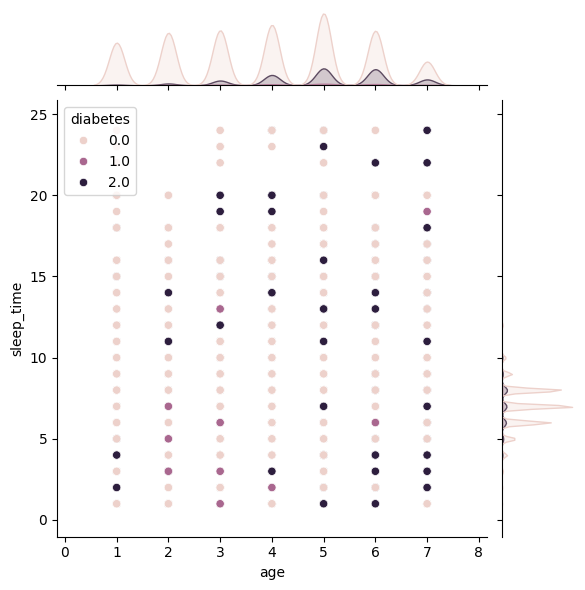

In [99]:
sns.jointplot(data=df, x="age", y="sleep_time", hue="diabetes")

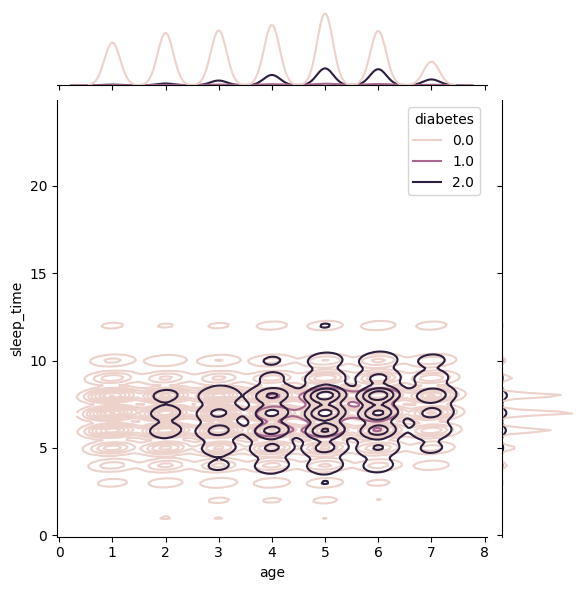

In [95]:
sns.jointplot(data=df, x="age", y="sleep_time", hue="diabetes", kind="kde")

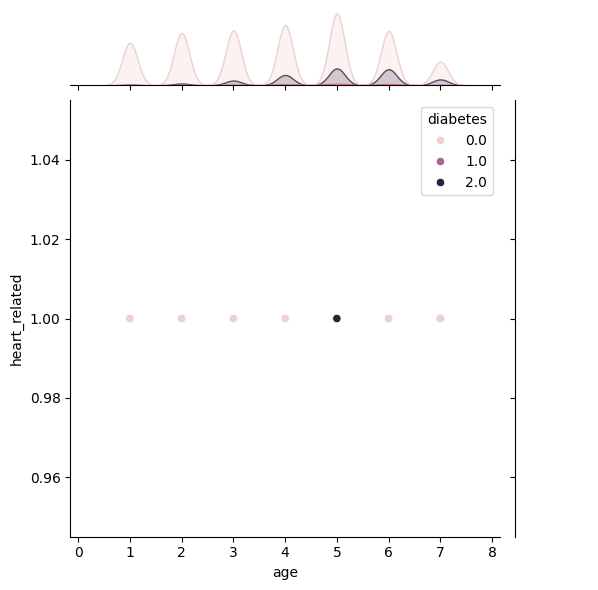

In [101]:
sns.jointplot(data=df, x="age", y="heart_related", hue="diabetes")

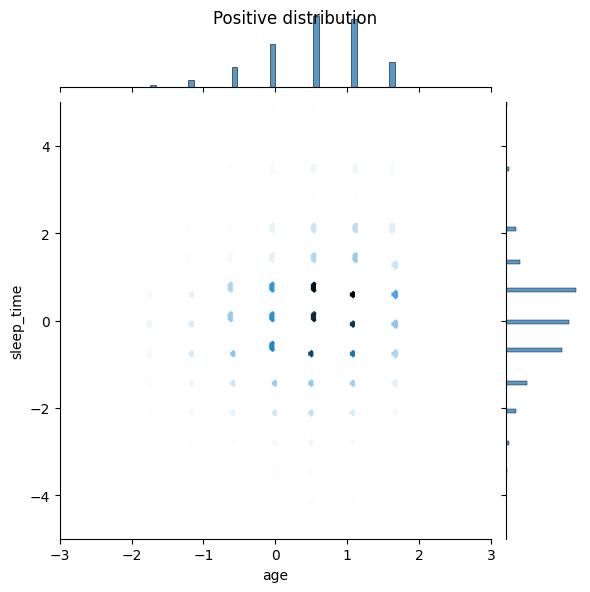

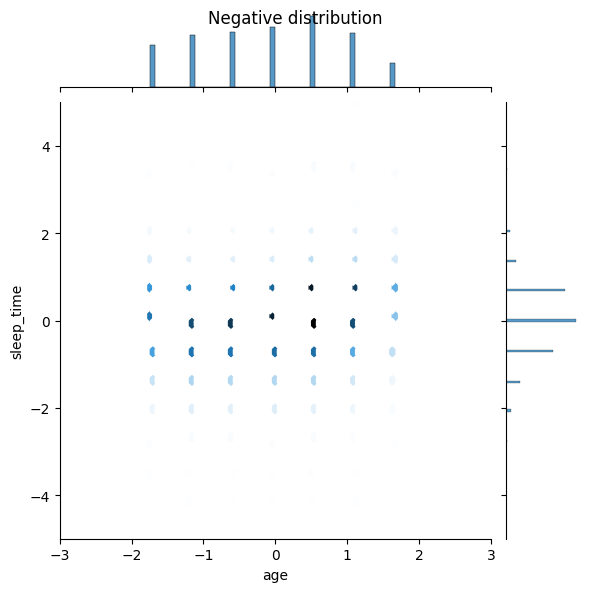

In [89]:
neg_df = pd.DataFrame(train_features[neg_train_labels ], columns=train_df.columns)
prediabetes_df = pd.DataFrame(train_features[ pre_train_labels], columns=train_df.columns)
diabetes_df = pd.DataFrame(train_features[dia_train_labels], columns=train_df.columns)

sns.jointplot(x=diabetes_df['age'], y=diabetes_df['sleep_time'],
              kind='hex', xlim=(-3,3), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['age'], y=neg_df['sleep_time'],
              kind='hex', xlim=(-3,3), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [202]:
feature_size = train_features.shape[-1]
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(feature_size * 12, activation='relu',input_shape=(train_features.shape[-1],)),
    # keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(feature_size * 6, activation='relu'),
    # keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(feature_size * 3, activation='relu'),
    # keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(3)
    tf.keras.layers.Dense(feature_size * feature_size, activation='relu',input_shape=(train_features.shape[-1],)),
    keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(feature_size * 30, activation='relu',input_shape=(train_features.shape[-1],)),
    keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(feature_size * 15, activation='relu',input_shape=(train_features.shape[-1],)),
    keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(feature_size * 5, activation='relu',input_shape=(train_features.shape[-1],)),
    keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3)    
])
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy (from_logits=True),
              metrics=['accuracy'])

model.fit(train_features, train_labels, epochs=10)

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 441)               9702      
                                                                 
 dropout_78 (Dropout)        (None, 441)               0         
                                                                 
 dense_118 (Dense)           (None, 630)               278460    
                                                                 
 dropout_79 (Dropout)        (None, 630)               0         
                                                                 
 dense_119 (Dense)           (None, 315)               198765    
                                                                 
 dropout_80 (Dropout)        (None, 315)               0         
                                                                 
 dense_120 (Dense)           (None, 105)             

In [204]:
test_loss, test_acc = model.evaluate(test_features,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

1894/1894 - 4s - loss: 0.4242 - accuracy: 0.8422 - 4s/epoch - 2ms/step

Test accuracy: 0.8421712517738342


In [208]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [216]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [217]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 21)               43        
 ion)                                                            
                                                                 
 dense_122 (Dense)           (None, 64)                1408      
                                                                 
 dense_123 (Dense)           (None, 64)                4160      
                                                                 
 dense_124 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5,676
Trainable params: 5,633
Non-trainable params: 43
_________________________________________________________________


In [222]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
4848/4848 [==============================] - 16s 3ms/step - loss: 0.2861 - val_loss: 0.2937
Epoch 2/100
4848/4848 [==============================] - 16s 3ms/step - loss: 0.2857 - val_loss: 0.2930
Epoch 3/100
4848/4848 [==============================] - 16s 3ms/step - loss: 0.2853 - val_loss: 0.2928
Epoch 4/100
4848/4848 [==============================] - 16s 3ms/step - loss: 0.2849 - val_loss: 0.2931
Epoch 5/100
4848/4848 [==============================] - 15s 3ms/step - loss: 0.2846 - val_loss: 0.2928
Epoch 6/100
4848/4848 [==============================] - 15s 3ms/step - loss: 0.2843 - val_loss: 0.2927
Epoch 7/100
4848/4848 [==============================] - 16s 3ms/step - loss: 0.2837 - val_loss: 0.2929
Epoch 8/100
4848/4848 [==============================] - 15s 3ms/step - loss: 0.2838 - val_loss: 0.2923
Epoch 9/100
4848/4848 [==============================] - 15s 3ms/step - loss: 0.2834 - val_loss: 0.2928
Epoch 10/100
4848/4848 [==============================] - 16s 3m

In [224]:
test_loss, test_acc = model.evaluate(test_features,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

1894/1894 - 4s - loss: 0.4242 - accuracy: 0.8422 - 4s/epoch - 2ms/step

Test accuracy: 0.8421712517738342
